<font color='red' size=6>**Exploratory data analysis**</font>
- other components of EDA (supporting files):
> - 01.A.Train_data_profile, 01.B.Test_data_profile - data profile with distributions, basic characteristics and interactions


In [1]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import sweetviz
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from tabulate import tabulate
for module in [pd, pandas_profiling, sweetviz, matplotlib, sns]:
    print(f"{module.__name__}: {module.__version__}")
    
%matplotlib inline  

pandas: 1.3.5
pandas_profiling: 3.1.0
sweetviz: 2.1.3
matplotlib: 3.5.1
seaborn: 0.11.2


# Basic data information

In [2]:
SRCTRAIN="/mnt/workdata/_WORK_/Kaggle_202205/data/org/pkl/train.pkl"
train_df = pd.read_pickle(SRCTRAIN)
SRCTEST="/mnt/workdata/_WORK_/Kaggle_202205/data/org/pkl/test.pkl"
test_df = pd.read_pickle(SRCTEST)

In [3]:
CONT_F = ['f_00','f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06',
              'f_19', 'f_20','f_21', 'f_22', 'f_23', 'f_24', 'f_25', 
              'f_26', 'f_28']
CAT_F = ['f_07','f_08', 'f_09','f_10','f_11','f_12','f_13', 
               'f_14','f_15','f_16','f_17','f_18','f_29','f_30']
OTHER_F =  [
    'f_27', # high cardinality categorical variable, must be encoded, (741354 unique train values)
]


In [21]:
# creating data ovierview - must be viewed in a browser, no inside Jupyter
train_report = sweetviz.analyze(train_df, target_feat='target')
train_report.show_html('00.Base EDA - train_data_report.html')
test_report = sweetviz.analyze(test_df)
test_report.show_html('00.Base EDA - test_data_report.html')

                                             |      | [  0%]   00:00 -> (? left)

Report 00.Base EDA - train_data_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


                                             |      | [  0%]   00:00 -> (? left)

Report 00.Base EDA - test_data_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [23]:
comparison_report = sweetviz.compare(source=(train_df, 'Train'), compare =(test_df, 'Test'), target_feat = 'target')
comparison_report.show_html("00.Base EDA - train_test_comparison.html")

                                             |      | [  0%]   00:00 -> (? left)

Report 00.Base EDA - train_test_comparison.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Important drawings**:
- there are no NaN values. Nans are absent in both train and test data
- distributions of features in train and test data are highlysimilar
- continuous features have only distinct values in train and test data respectively
- there is one feature non - numeric, and with high cardinality

## Continuous features train/test distributions

In [4]:
from scipy.stats import shapiro, normaltest, anderson, kstest

In [7]:
def plot_cont_feat(feat_name, tr=train_df, te=test_df):
    _=tr.append(te)[[feat_name, 'target']]
    _['subset'] = _['target'].apply(lambda x: 'TEST' if pd.isna(x) else 'TRAIN')
    _=_[[feat_name, 'subset']]
    fig, ax= plt.subplots(1,3,figsize=(21,6))
    sns.histplot(data=_.loc[_['subset']=="TRAIN"], x=feat_name, ax=ax[0])
    ax[0].set_title('TRAIN')
    sns.histplot(data=_.loc[_['subset']=="TEST"], x=feat_name, ax=ax[1], color='Orange')
    ax[1].set_title('TEST')
    sns.boxplot(data=_, x=feat_name, y='subset', ax=ax[2])
    plt.show()
    
def check_normality(feat_name, tr=train_df, te=test_df):
    res_train=dict()
    res_test=dict()
    
    stat, p = shapiro(tr[feat_name])
    res_train['Shapiro'] = {'stat': stat, 'p-value': p, 'result': 'Normal' if p>=0.05 else 'NON-Normal'}
    stat, p = shapiro(te[feat_name])
    res_test['Shapiro'] = {'stat': stat, 'p-value': p, 'result': 'Normal' if p>=0.05 else 'NON-Normal'}
    
    stat, p = normaltest(tr[feat_name])
    res_train['DAgostino'] = {'stat': stat, 'p-value': p, 'result': 'Normal' if p>=0.05 else 'NON-Normal'}
    stat, p = normaltest(te[feat_name])
    res_test['DAgostino'] = {'stat': stat, 'p-value': p, 'result': 'Normal' if p>=0.05 else 'NON-Normal'}
    
    stat, p = kstest(tr[feat_name], 'norm')
    res_train['K-S test'] = {'stat': stat, 'p-value': p, 'result': 'Normal' if p>=0.05 else 'NON-Normal'}
    stat, p = kstest(te[feat_name], 'norm')
    res_test['K-S test'] = {'stat': stat, 'p-value': p, 'result': 'Normal' if p>=0.05 else 'NON-Normal'}
    
    train_res_df=pd.DataFrame.from_dict(res_train, orient='index')
    print(tabulate(train_res_df, headers='keys', tablefmt='fancy_grid', floatfmt=(".4f")))
    print()
    test_res_df=pd.DataFrame.from_dict(res_test, orient='index')
    print(tabulate(test_res_df, headers='keys', tablefmt='fancy_grid', floatfmt=(".4f")))
    return  train_res_df, test_res_df

def plot_qq(feat_name, tr=train_df, te=test_df):
    

### Feature: **f_00**

╒═══════════╤════════╤═══════════╤══════════╕
│           │   stat │   p-value │ result   │
╞═══════════╪════════╪═══════════╪══════════╡
│ Shapiro   │ 1.0003 │    1.0000 │ Normal   │
├───────────┼────────┼───────────┼──────────┤
│ DAgostino │ 5.1467 │    0.0763 │ Normal   │
├───────────┼────────┼───────────┼──────────┤
│ K-S test  │ 0.0008 │    0.6378 │ Normal   │
╘═══════════╧════════╧═══════════╧══════════╛

╒═══════════╤════════╤═══════════╤════════════╕
│           │   stat │   p-value │ result     │
╞═══════════╪════════╪═══════════╪════════════╡
│ Shapiro   │ 0.9999 │    0.0000 │ NON-Normal │
├───────────┼────────┼───────────┼────────────┤
│ DAgostino │ 1.9719 │    0.3731 │ Normal     │
├───────────┼────────┼───────────┼────────────┤
│ K-S test  │ 0.0008 │    0.7861 │ Normal     │
╘═══════════╧════════╧═══════════╧════════════╛


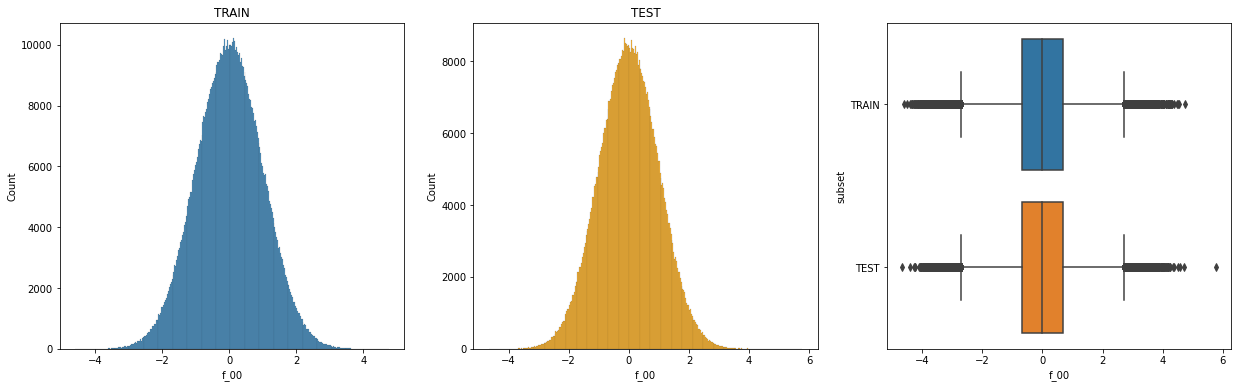

### Feature: **f_01**

/home/mchomicz/envs/Kaggle_202205/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


╒═══════════╤════════╤═══════════╤══════════╕
│           │   stat │   p-value │ result   │
╞═══════════╪════════╪═══════════╪══════════╡
│ Shapiro   │ 1.0003 │    1.0000 │ Normal   │
├───────────┼────────┼───────────┼──────────┤
│ DAgostino │ 0.6962 │    0.7060 │ Normal   │
├───────────┼────────┼───────────┼──────────┤
│ K-S test  │ 0.0010 │    0.2797 │ Normal   │
╘═══════════╧════════╧═══════════╧══════════╛

╒═══════════╤════════╤═══════════╤════════════╕
│           │   stat │   p-value │ result     │
╞═══════════╪════════╪═══════════╪════════════╡
│ Shapiro   │ 1.0000 │    0.0000 │ NON-Normal │
├───────────┼────────┼───────────┼────────────┤
│ DAgostino │ 1.8826 │    0.3901 │ Normal     │
├───────────┼────────┼───────────┼────────────┤
│ K-S test  │ 0.0013 │    0.1607 │ Normal     │
╘═══════════╧════════╧═══════════╧════════════╛


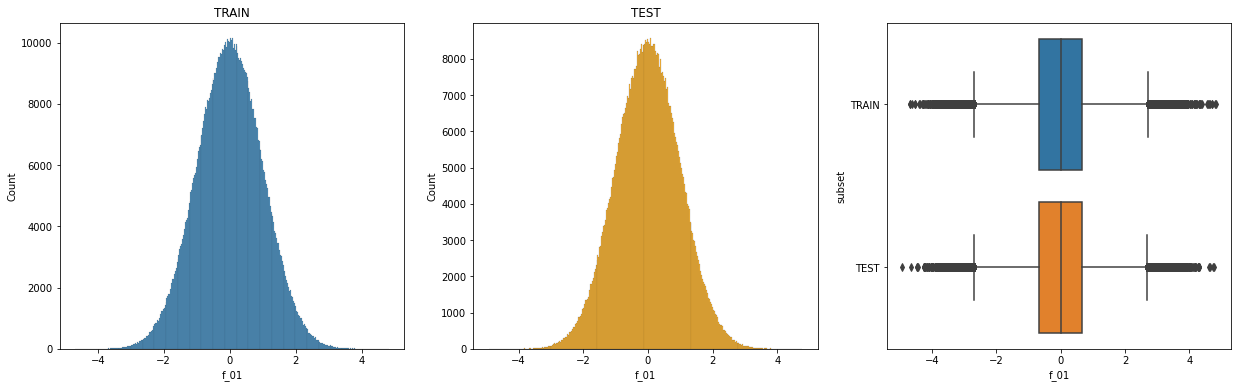

### Feature: **f_02**

/home/mchomicz/envs/Kaggle_202205/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


╒═══════════╤════════╤═══════════╤════════════╕
│           │   stat │   p-value │ result     │
╞═══════════╪════════╪═══════════╪════════════╡
│ Shapiro   │ 1.0002 │    1.0000 │ Normal     │
├───────────┼────────┼───────────┼────────────┤
│ DAgostino │ 7.7163 │    0.0211 │ NON-Normal │
├───────────┼────────┼───────────┼────────────┤
│ K-S test  │ 0.0013 │    0.1124 │ Normal     │
╘═══════════╧════════╧═══════════╧════════════╛

╒═══════════╤════════╤═══════════╤══════════╕
│           │   stat │   p-value │ result   │
╞═══════════╪════════╪═══════════╪══════════╡
│ Shapiro   │ 1.0003 │    1.0000 │ Normal   │
├───────────┼────────┼───────────┼──────────┤
│ DAgostino │ 1.0336 │    0.5964 │ Normal   │
├───────────┼────────┼───────────┼──────────┤
│ K-S test  │ 0.0011 │    0.3641 │ Normal   │
╘═══════════╧════════╧═══════════╧══════════╛


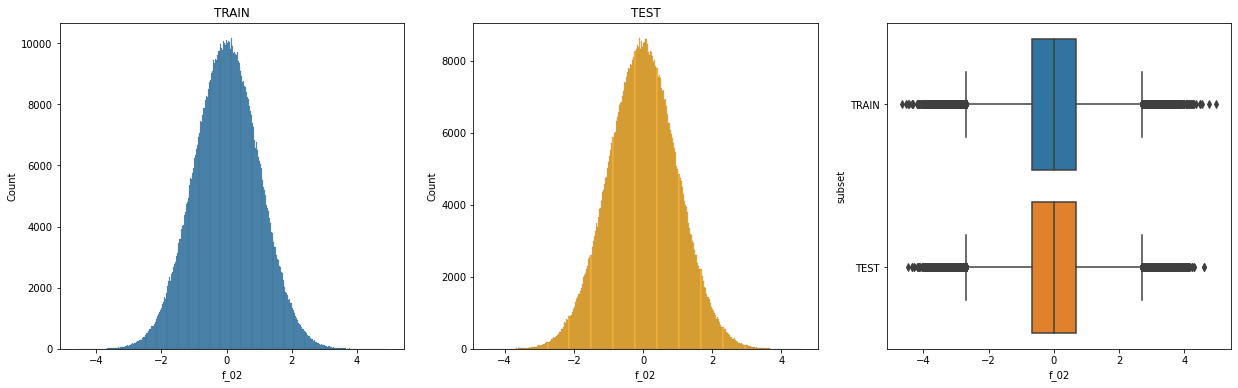

### Feature: **f_03**

/home/mchomicz/envs/Kaggle_202205/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


╒═══════════╤════════╤═══════════╤══════════╕
│           │   stat │   p-value │ result   │
╞═══════════╪════════╪═══════════╪══════════╡
│ Shapiro   │ 1.0002 │    1.0000 │ Normal   │
├───────────┼────────┼───────────┼──────────┤
│ DAgostino │ 3.1854 │    0.2034 │ Normal   │
├───────────┼────────┼───────────┼──────────┤
│ K-S test  │ 0.0011 │    0.2601 │ Normal   │
╘═══════════╧════════╧═══════════╧══════════╛

╒═══════════╤════════╤═══════════╤════════════╕
│           │   stat │   p-value │ result     │
╞═══════════╪════════╪═══════════╪════════════╡
│ Shapiro   │ 1.0000 │    0.0000 │ NON-Normal │
├───────────┼────────┼───────────┼────────────┤
│ DAgostino │ 0.1836 │    0.9123 │ Normal     │
├───────────┼────────┼───────────┼────────────┤
│ K-S test  │ 0.0010 │    0.5147 │ Normal     │
╘═══════════╧════════╧═══════════╧════════════╛


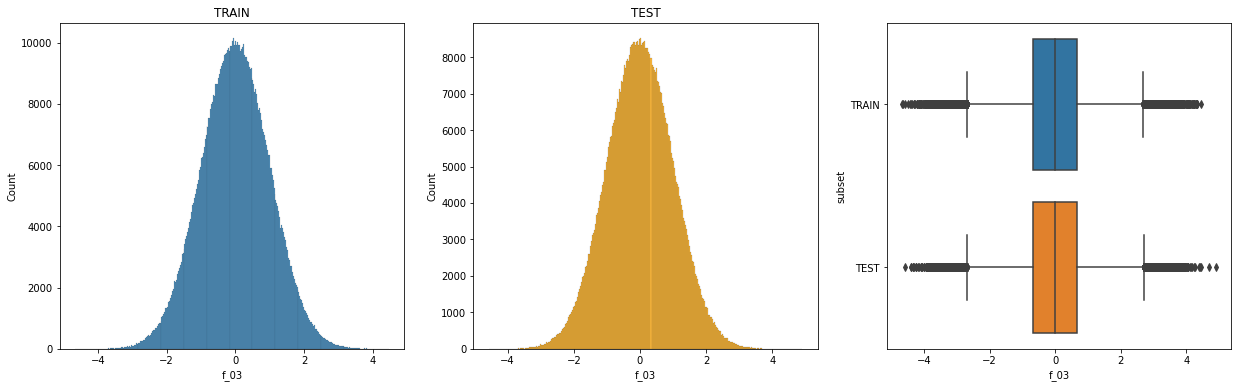

### Feature: **f_04**

/home/mchomicz/envs/Kaggle_202205/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


╒═══════════╤════════╤═══════════╤══════════╕
│           │   stat │   p-value │ result   │
╞═══════════╪════════╪═══════════╪══════════╡
│ Shapiro   │ 1.0002 │    1.0000 │ Normal   │
├───────────┼────────┼───────────┼──────────┤
│ DAgostino │ 4.5468 │    0.1030 │ Normal   │
├───────────┼────────┼───────────┼──────────┤
│ K-S test  │ 0.0011 │    0.2590 │ Normal   │
╘═══════════╧════════╧═══════════╧══════════╛

╒═══════════╤════════╤═══════════╤══════════╕
│           │   stat │   p-value │ result   │
╞═══════════╪════════╪═══════════╪══════════╡
│ Shapiro   │ 1.0003 │    1.0000 │ Normal   │
├───────────┼────────┼───────────┼──────────┤
│ DAgostino │ 3.2755 │    0.1944 │ Normal   │
├───────────┼────────┼───────────┼──────────┤
│ K-S test  │ 0.0008 │    0.7618 │ Normal   │
╘═══════════╧════════╧═══════════╧══════════╛


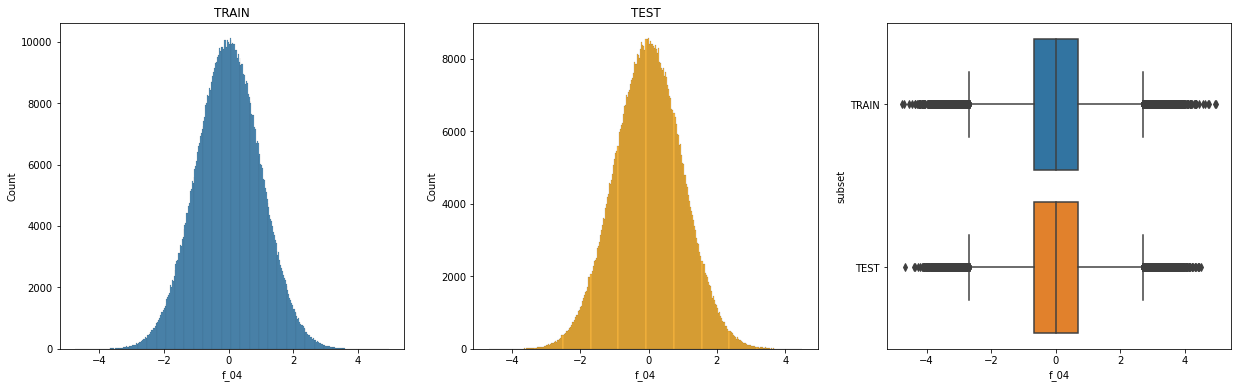

### Feature: **f_05**

/home/mchomicz/envs/Kaggle_202205/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


╒═══════════╤════════╤═══════════╤══════════╕
│           │   stat │   p-value │ result   │
╞═══════════╪════════╪═══════════╪══════════╡
│ Shapiro   │ 1.0002 │    1.0000 │ Normal   │
├───────────┼────────┼───────────┼──────────┤
│ DAgostino │ 0.2001 │    0.9048 │ Normal   │
├───────────┼────────┼───────────┼──────────┤
│ K-S test  │ 0.0007 │    0.7213 │ Normal   │
╘═══════════╧════════╧═══════════╧══════════╛

╒═══════════╤════════╤═══════════╤════════════╕
│           │   stat │   p-value │ result     │
╞═══════════╪════════╪═══════════╪════════════╡
│ Shapiro   │ 0.9999 │    0.0000 │ NON-Normal │
├───────────┼────────┼───────────┼────────────┤
│ DAgostino │ 0.7719 │    0.6798 │ Normal     │
├───────────┼────────┼───────────┼────────────┤
│ K-S test  │ 0.0009 │    0.6874 │ Normal     │
╘═══════════╧════════╧═══════════╧════════════╛


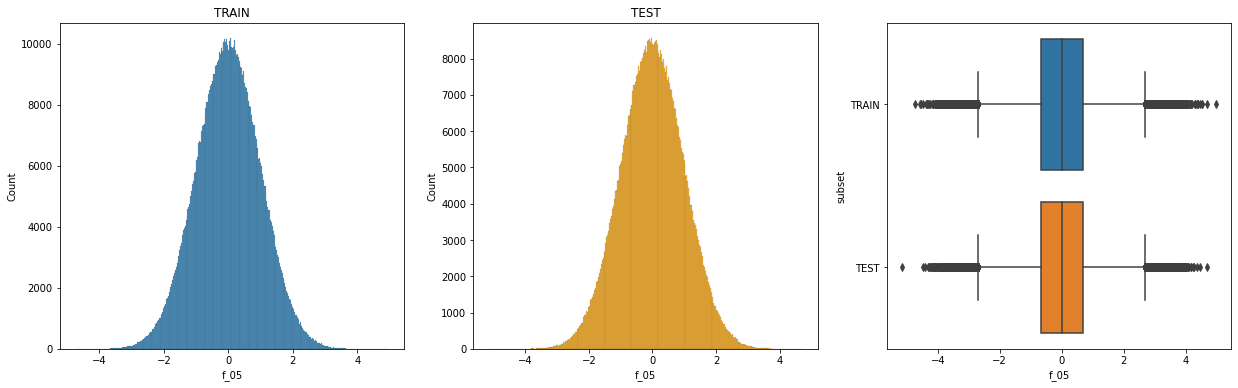

### Feature: **f_06**

/home/mchomicz/envs/Kaggle_202205/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


╒═══════════╤════════╤═══════════╤══════════╕
│           │   stat │   p-value │ result   │
╞═══════════╪════════╪═══════════╪══════════╡
│ Shapiro   │ 1.0003 │    1.0000 │ Normal   │
├───────────┼────────┼───────────┼──────────┤
│ DAgostino │ 0.0120 │    0.9940 │ Normal   │
├───────────┼────────┼───────────┼──────────┤
│ K-S test  │ 0.0007 │    0.8129 │ Normal   │
╘═══════════╧════════╧═══════════╧══════════╛

╒═══════════╤════════╤═══════════╤══════════╕
│           │   stat │   p-value │ result   │
╞═══════════╪════════╪═══════════╪══════════╡
│ Shapiro   │ 1.0000 │    0.3727 │ Normal   │
├───────────┼────────┼───────────┼──────────┤
│ DAgostino │ 0.0400 │    0.9802 │ Normal   │
├───────────┼────────┼───────────┼──────────┤
│ K-S test  │ 0.0013 │    0.1599 │ Normal   │
╘═══════════╧════════╧═══════════╧══════════╛


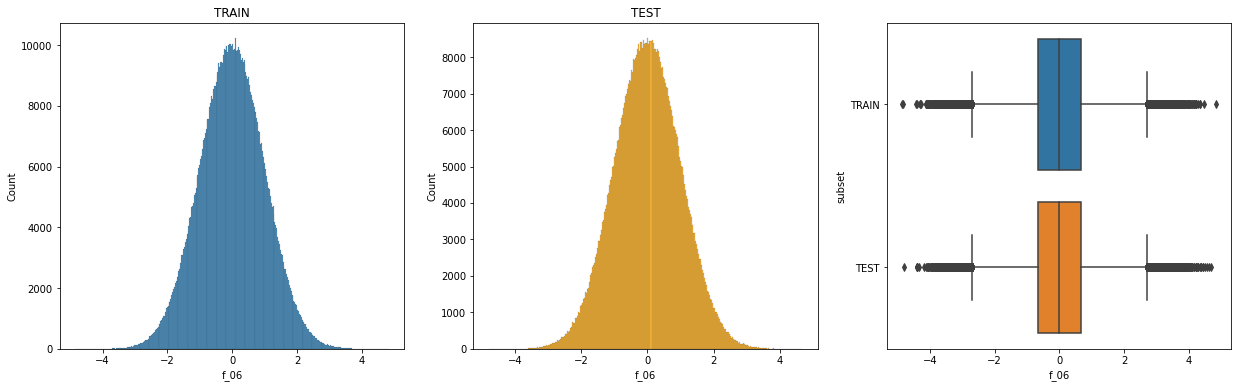

### Feature: **f_19**

/home/mchomicz/envs/Kaggle_202205/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


╒═══════════╤══════════╤═══════════╤════════════╕
│           │     stat │   p-value │ result     │
╞═══════════╪══════════╪═══════════╪════════════╡
│ Shapiro   │   1.0001 │    1.0000 │ Normal     │
├───────────┼──────────┼───────────┼────────────┤
│ DAgostino │ 586.7130 │    0.0000 │ NON-Normal │
├───────────┼──────────┼───────────┼────────────┤
│ K-S test  │   0.2408 │    0.0000 │ NON-Normal │
╘═══════════╧══════════╧═══════════╧════════════╛

╒═══════════╤══════════╤═══════════╤════════════╕
│           │     stat │   p-value │ result     │
╞═══════════╪══════════╪═══════════╪════════════╡
│ Shapiro   │   0.9998 │    0.0000 │ NON-Normal │
├───────────┼──────────┼───────────┼────────────┤
│ DAgostino │ 399.8480 │    0.0000 │ NON-Normal │
├───────────┼──────────┼───────────┼────────────┤
│ K-S test  │   0.2397 │    0.0000 │ NON-Normal │
╘═══════════╧══════════╧═══════════╧════════════╛


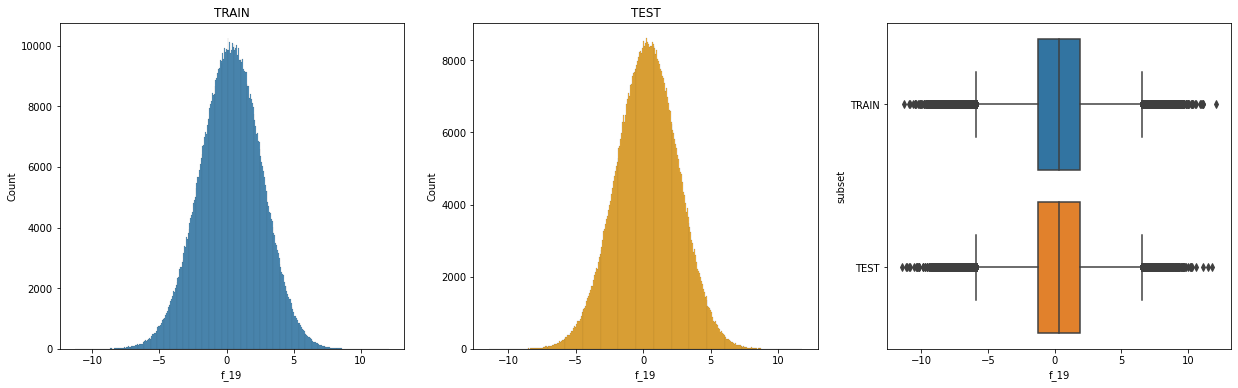

### Feature: **f_20**

/home/mchomicz/envs/Kaggle_202205/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


╒═══════════╤═════════╤═══════════╤════════════╕
│           │    stat │   p-value │ result     │
╞═══════════╪═════════╪═══════════╪════════════╡
│ Shapiro   │  1.0003 │    1.0000 │ Normal     │
├───────────┼─────────┼───────────┼────────────┤
│ DAgostino │ 19.6147 │    0.0001 │ NON-Normal │
├───────────┼─────────┼───────────┼────────────┤
│ K-S test  │  0.2260 │    0.0000 │ NON-Normal │
╘═══════════╧═════════╧═══════════╧════════════╛

╒═══════════╤═════════╤═══════════╤════════════╕
│           │    stat │   p-value │ result     │
╞═══════════╪═════════╪═══════════╪════════════╡
│ Shapiro   │  1.0002 │    1.0000 │ Normal     │
├───────────┼─────────┼───────────┼────────────┤
│ DAgostino │ 23.6077 │    0.0000 │ NON-Normal │
├───────────┼─────────┼───────────┼────────────┤
│ K-S test  │  0.2251 │    0.0000 │ NON-Normal │
╘═══════════╧═════════╧═══════════╧════════════╛


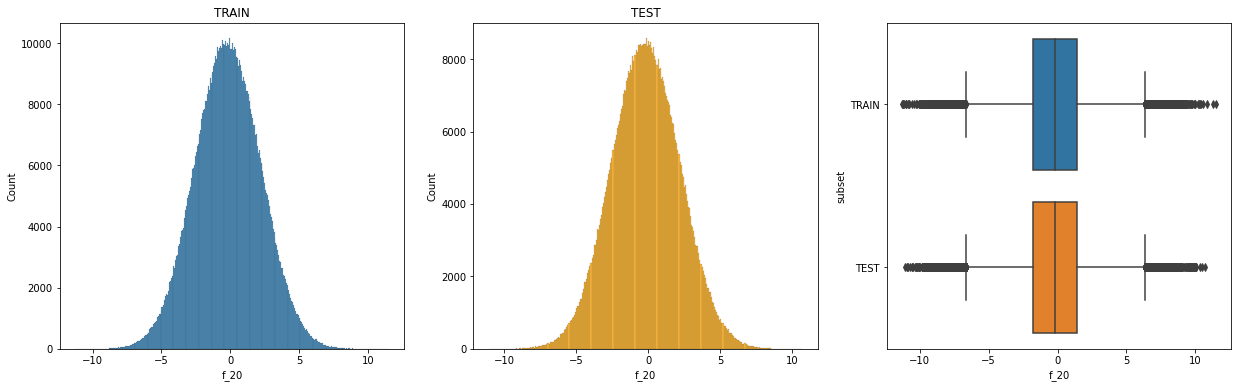

### Feature: **f_21**

/home/mchomicz/envs/Kaggle_202205/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


╒═══════════╤══════════╤═══════════╤════════════╕
│           │     stat │   p-value │ result     │
╞═══════════╪══════════╪═══════════╪════════════╡
│ Shapiro   │   0.9998 │    0.0000 │ NON-Normal │
├───────────┼──────────┼───────────┼────────────┤
│ DAgostino │ 298.2678 │    0.0000 │ NON-Normal │
├───────────┼──────────┼───────────┼────────────┤
│ K-S test  │   0.2263 │    0.0000 │ NON-Normal │
╘═══════════╧══════════╧═══════════╧════════════╛

╒═══════════╤══════════╤═══════════╤════════════╕
│           │     stat │   p-value │ result     │
╞═══════════╪══════════╪═══════════╪════════════╡
│ Shapiro   │   0.9998 │    0.0000 │ NON-Normal │
├───────────┼──────────┼───────────┼────────────┤
│ DAgostino │ 245.6129 │    0.0000 │ NON-Normal │
├───────────┼──────────┼───────────┼────────────┤
│ K-S test  │   0.2262 │    0.0000 │ NON-Normal │
╘═══════════╧══════════╧═══════════╧════════════╛


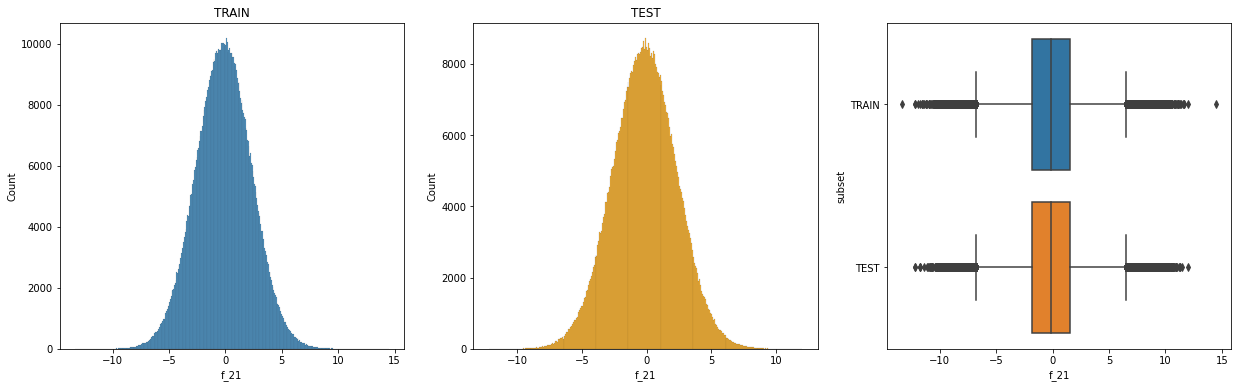

### Feature: **f_22**

/home/mchomicz/envs/Kaggle_202205/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


╒═══════════╤══════════╤═══════════╤════════════╕
│           │     stat │   p-value │ result     │
╞═══════════╪══════════╪═══════════╪════════════╡
│ Shapiro   │   1.0000 │    0.0000 │ NON-Normal │
├───────────┼──────────┼───────────┼────────────┤
│ DAgostino │ 932.7029 │    0.0000 │ NON-Normal │
├───────────┼──────────┼───────────┼────────────┤
│ K-S test  │   0.2057 │    0.0000 │ NON-Normal │
╘═══════════╧══════════╧═══════════╧════════════╛

╒═══════════╤══════════╤═══════════╤════════════╕
│           │     stat │   p-value │ result     │
╞═══════════╪══════════╪═══════════╪════════════╡
│ Shapiro   │   0.9999 │    0.0000 │ NON-Normal │
├───────────┼──────────┼───────────┼────────────┤
│ DAgostino │ 680.5648 │    0.0000 │ NON-Normal │
├───────────┼──────────┼───────────┼────────────┤
│ K-S test  │   0.2060 │    0.0000 │ NON-Normal │
╘═══════════╧══════════╧═══════════╧════════════╛


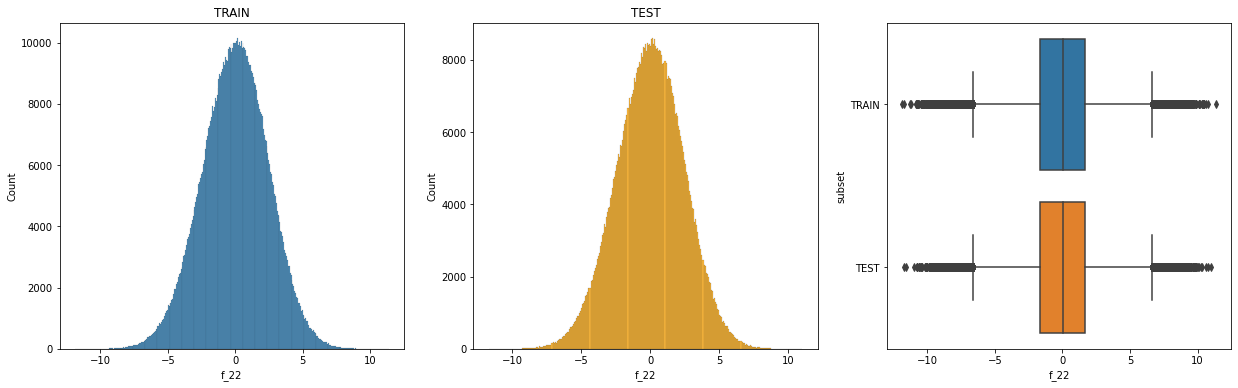

### Feature: **f_23**

/home/mchomicz/envs/Kaggle_202205/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


╒═══════════╤══════════╤═══════════╤════════════╕
│           │     stat │   p-value │ result     │
╞═══════════╪══════════╪═══════════╪════════════╡
│ Shapiro   │   1.0002 │    1.0000 │ Normal     │
├───────────┼──────────┼───────────┼────────────┤
│ DAgostino │ 674.8292 │    0.0000 │ NON-Normal │
├───────────┼──────────┼───────────┼────────────┤
│ K-S test  │   0.2577 │    0.0000 │ NON-Normal │
╘═══════════╧══════════╧═══════════╧════════════╛

╒═══════════╤══════════╤═══════════╤════════════╕
│           │     stat │   p-value │ result     │
╞═══════════╪══════════╪═══════════╪════════════╡
│ Shapiro   │   0.9998 │    0.0000 │ NON-Normal │
├───────────┼──────────┼───────────┼────────────┤
│ DAgostino │ 523.6835 │    0.0000 │ NON-Normal │
├───────────┼──────────┼───────────┼────────────┤
│ K-S test  │   0.2579 │    0.0000 │ NON-Normal │
╘═══════════╧══════════╧═══════════╧════════════╛


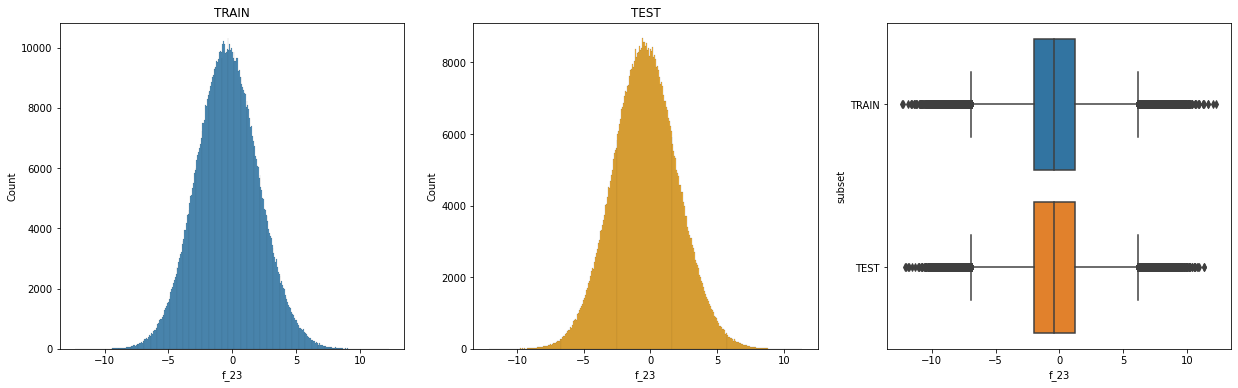

### Feature: **f_24**

/home/mchomicz/envs/Kaggle_202205/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


╒═══════════╤═════════╤═══════════╤════════════╕
│           │    stat │   p-value │ result     │
╞═══════════╪═════════╪═══════════╪════════════╡
│ Shapiro   │  1.0004 │    1.0000 │ Normal     │
├───────────┼─────────┼───────────┼────────────┤
│ DAgostino │ 10.7482 │    0.0046 │ NON-Normal │
├───────────┼─────────┼───────────┼────────────┤
│ K-S test  │  0.2485 │    0.0000 │ NON-Normal │
╘═══════════╧═════════╧═══════════╧════════════╛

╒═══════════╤════════╤═══════════╤════════════╕
│           │   stat │   p-value │ result     │
╞═══════════╪════════╪═══════════╪════════════╡
│ Shapiro   │ 1.0002 │    1.0000 │ Normal     │
├───────────┼────────┼───────────┼────────────┤
│ DAgostino │ 7.7363 │    0.0209 │ NON-Normal │
├───────────┼────────┼───────────┼────────────┤
│ K-S test  │ 0.2476 │    0.0000 │ NON-Normal │
╘═══════════╧════════╧═══════════╧════════════╛


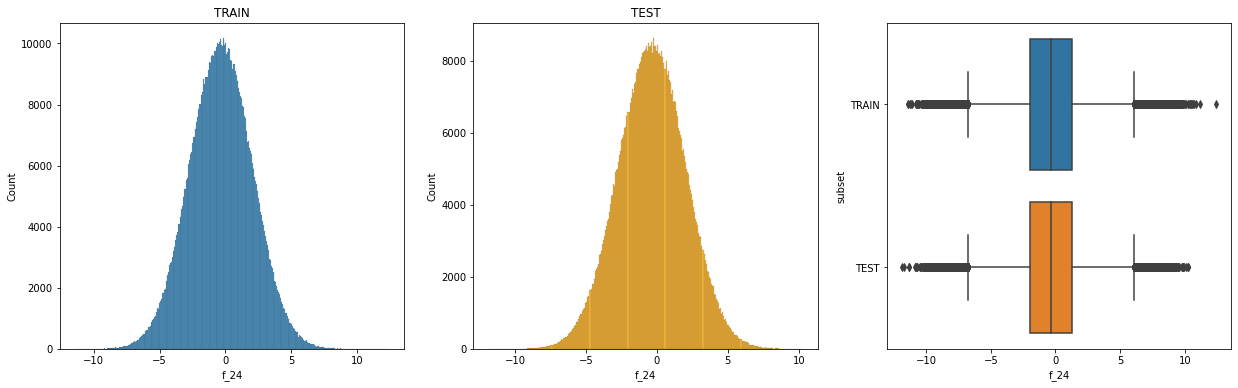

### Feature: **f_25**

/home/mchomicz/envs/Kaggle_202205/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


╒═══════════╤══════════╤═══════════╤════════════╕
│           │     stat │   p-value │ result     │
╞═══════════╪══════════╪═══════════╪════════════╡
│ Shapiro   │   1.0003 │    1.0000 │ Normal     │
├───────────┼──────────┼───────────┼────────────┤
│ DAgostino │ 388.7376 │    0.0000 │ NON-Normal │
├───────────┼──────────┼───────────┼────────────┤
│ K-S test  │   0.2238 │    0.0000 │ NON-Normal │
╘═══════════╧══════════╧═══════════╧════════════╛

╒═══════════╤══════════╤═══════════╤════════════╕
│           │     stat │   p-value │ result     │
╞═══════════╪══════════╪═══════════╪════════════╡
│ Shapiro   │   0.9998 │    0.0000 │ NON-Normal │
├───────────┼──────────┼───────────┼────────────┤
│ DAgostino │ 305.5816 │    0.0000 │ NON-Normal │
├───────────┼──────────┼───────────┼────────────┤
│ K-S test  │   0.2238 │    0.0000 │ NON-Normal │
╘═══════════╧══════════╧═══════════╧════════════╛


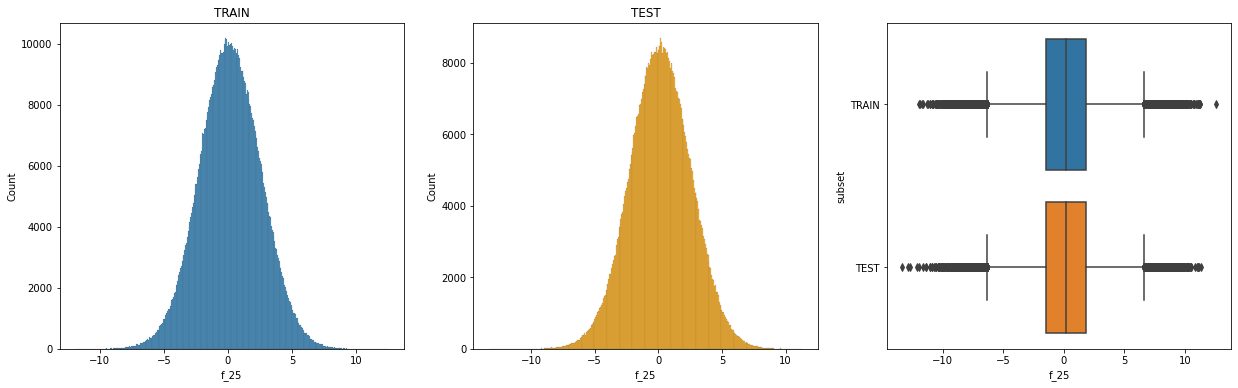

### Feature: **f_26**

/home/mchomicz/envs/Kaggle_202205/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


╒═══════════╤═══════════╤═══════════╤════════════╕
│           │      stat │   p-value │ result     │
╞═══════════╪═══════════╪═══════════╪════════════╡
│ Shapiro   │    0.9989 │    0.0000 │ NON-Normal │
├───────────┼───────────┼───────────┼────────────┤
│ DAgostino │ 3383.5722 │    0.0000 │ NON-Normal │
├───────────┼───────────┼───────────┼────────────┤
│ K-S test  │    0.2595 │    0.0000 │ NON-Normal │
╘═══════════╧═══════════╧═══════════╧════════════╛

╒═══════════╤═══════════╤═══════════╤════════════╕
│           │      stat │   p-value │ result     │
╞═══════════╪═══════════╪═══════════╪════════════╡
│ Shapiro   │    0.9990 │    0.0000 │ NON-Normal │
├───────────┼───────────┼───────────┼────────────┤
│ DAgostino │ 2409.8347 │    0.0000 │ NON-Normal │
├───────────┼───────────┼───────────┼────────────┤
│ K-S test  │    0.2587 │    0.0000 │ NON-Normal │
╘═══════════╧═══════════╧═══════════╧════════════╛


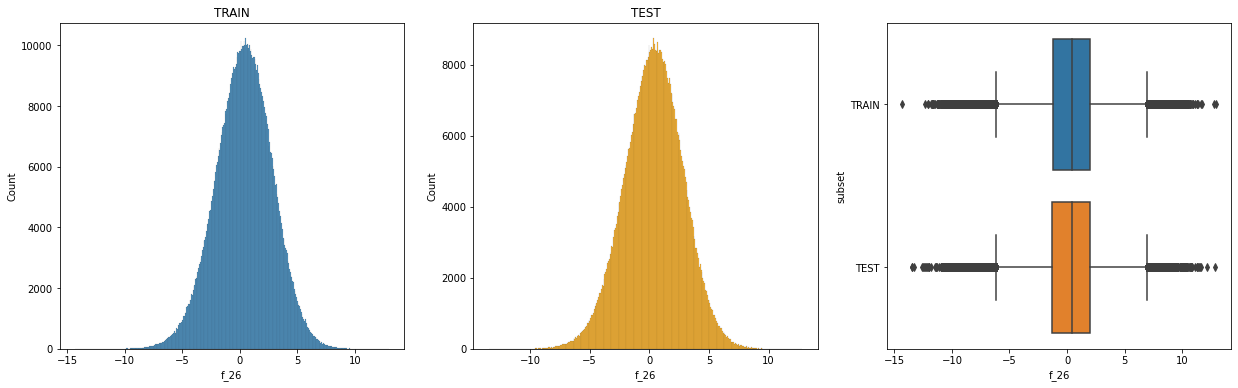

### Feature: **f_28**

/home/mchomicz/envs/Kaggle_202205/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


╒═══════════╤══════════╤═══════════╤════════════╕
│           │     stat │   p-value │ result     │
╞═══════════╪══════════╪═══════════╪════════════╡
│ Shapiro   │   1.0003 │    1.0000 │ Normal     │
├───────────┼──────────┼───────────┼────────────┤
│ DAgostino │ 336.8989 │    0.0000 │ NON-Normal │
├───────────┼──────────┼───────────┼────────────┤
│ K-S test  │   0.4949 │    0.0000 │ NON-Normal │
╘═══════════╧══════════╧═══════════╧════════════╛

╒═══════════╤══════════╤═══════════╤════════════╕
│           │     stat │   p-value │ result     │
╞═══════════╪══════════╪═══════════╪════════════╡
│ Shapiro   │   0.9999 │    0.0000 │ NON-Normal │
├───────────┼──────────┼───────────┼────────────┤
│ DAgostino │ 315.9327 │    0.0000 │ NON-Normal │
├───────────┼──────────┼───────────┼────────────┤
│ K-S test  │   0.4951 │    0.0000 │ NON-Normal │
╘═══════════╧══════════╧═══════════╧════════════╛


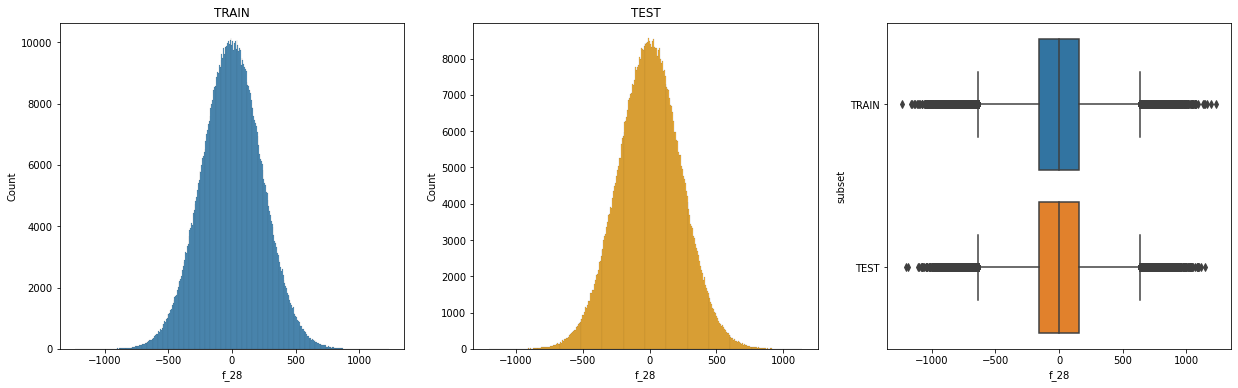

In [8]:
for feat_ in CONT_F:
    display(Markdown(f'### Feature: **{feat_}**'))
    train_res, test_res = check_normality(feat_)
    plot_cont_feat(feat_)
